In [1]:
# https://github.com/tallesfelix/directions-with-osm-networkx/blob/master/Creating%20routes%20with%20networkx%20and%20ipyleaflet.ipynb
import networkx as nx
import osmnx as ox
from shapely.geometry import LineString, mapping
import geopandas as gpd
from ipyleaflet import *

/home/blaxeep/.local/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


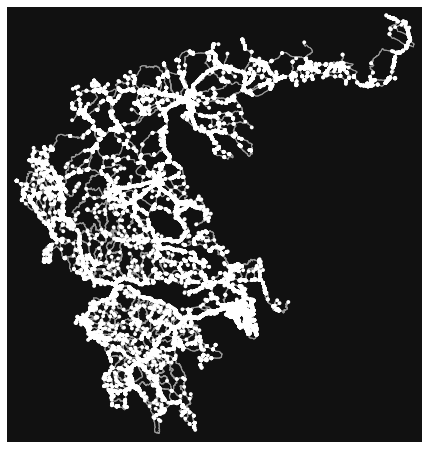

In [2]:
place_name = "Greece"
ox.config(use_cache=True, log_console=True)
cf = '["highway"~"motorway|motorway_link|trunk|secondary|primary"]'
graph = ox.graph_from_place(place_name, network_type='drive', custom_filter=cf)
fig, ax = ox.plot_graph(graph)

In [3]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes

,y,x,osmid,highway,ref,geometry
26738016,37.716458,24.054811,26738016,NaN,NaN,POINT (24.05481 37.71646)
26738466,37.713444,24.059497,26738466,NaN,NaN,POINT (24.05950 37.71344)
26738490,37.712957,24.056975,26738490,NaN,NaN,POINT (24.05698 37.71296)
26738496,37.713053,24.056386,26738496,NaN,NaN,POINT (24.05639 37.71305)
26738598,37.714155,24.056792,26738598,NaN,NaN,POINT (24.05679 37.71416)
...,...,...,...,...,...,...
1421511783,39.652249,20.157487,1421511783,NaN,NaN,POINT (20.15749 39.65225)
1421512259,39.650549,20.160456,1421512259,NaN,NaN,POINT (20.16046 39.65055)
1423151279,39.910536,20.369289,1423151279,NaN,NaN,POINT (20.36929 39.91054)
7143460162,39.910713,20.363622,7143460162,NaN,NaN,POINT (20.36362 39.91071)


In [4]:
center = (37.714155,24.056792)
m = Map(center=center, basemap=basemaps.CartoDB.Positron, zoom=8)
m

Map(center=[37.714155, 24.056792], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [5]:
edges

,osmid,oneway,ref,name,highway,length,geometry,lanes,maxspeed,bridge,tunnel,junction,width,access,est_width,service,area,u,v,key
0,"[680833745, 680834433, 47105933]",True,ΕΟ89,Ηρώων Πολυτεχνείου,primary,244.776,"LINESTRING (24.05481 37.71646, 24.05478 37.716...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26738016,6375260438,0
1,291932660,False,ΕΟ89,Λαυρίου,primary,939.063,"LINESTRING (24.05481 37.71646, 24.05451 37.716...",2,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26738016,2954361205,0
2,"[291932656, 813496552, 813496551]",True,NaN,Μίκη Θεοδωράκη,secondary,96.586,"LINESTRING (24.05950 37.71344, 24.05976 37.713...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26738466,514489319,0
3,"[866279744, 744205004, 866894652]",False,NaN,Μίκη Θεοδωράκη,secondary,126.038,"LINESTRING (24.05950 37.71344, 24.05916 37.713...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26738466,387546727,0
4,744205001,False,NaN,NaN,secondary,10.420,"LINESTRING (24.05698 37.71296, 24.05690 37.71303)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26738490,6965049404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45097,"[128894467, 128894509, 128894469, 128894511]",True,ΕΟ22,Καλπακίου - Κακαβιάς,trunk,523.387,"LINESTRING (20.36929 39.91054, 20.36909 39.910...","[1, 2]","[30, 50]",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1423151279,623809603,0
45098,"[128894500, 128898276, 128898299, 128894516, 1...",False,ΕΟ22,Καλπακίου - Κακαβιάς,trunk,3120.630,"LINESTRING (20.36929 39.91054, 20.36935 39.910...",2,"[80, 50]",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1423151279,1423186312,0
45099,26944477,True,ΕΟ22,NaN,trunk,20.303,"LINESTRING (20.36362 39.91071, 20.36365 39.910...",NaN,30,NaN,NaN,roundabout,NaN,NaN,NaN,NaN,NaN,7143460162,623809603,0
45100,"[128894480, 128894465, 290802435, 128894492]",True,ΕΟ22,Καλπακίου - Κακαβιάς,trunk,516.059,"LINESTRING (20.36362 39.91071, 20.36379 39.910...","[1, 2]","[50, 30]",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7143460162,1423151279,0


In [68]:
to_marker_style = AwesomeIcon(
    name='circle',
    icon_color='white',
    marker_color='red',
    spin=False
)
from_marker = Marker(location=center)
print(from_marker)
to_marker = Marker(location=center, icon=to_marker_style)

Marker(location=[37.714155, 24.056792], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset'])


In [69]:
def set_nearest_node(marker):
 marker.nearest_node = ox.get_nearest_node(graph, marker.location)
 print(marker.nearest_node)
 return

In [70]:
path_layer_list = []
def handle_change_location(event, marker):
    event_owner = event['owner']
    event_owner.nearest_node = ox.get_nearest_node(graph, event_owner.location)
    marker.nearest_node = ox.get_nearest_node(graph, marker.location)
    
    shortest_path = nx.dijkstra_path(graph, event_owner.nearest_node, marker.nearest_node, 
                                     weight='length')
    
    if len(path_layer_list) == 1:
        m.remove_layer(path_layer_list[0])
        path_layer_list.pop()
    
    shortest_path_points = nodes.loc[shortest_path]
    path = gpd.GeoDataFrame([LineString(shortest_path_points.geometry.values)], columns=['geometry'])
    path_layer = GeoData(geo_dataframe=path, style={'color':'black', 'weight':2})
    m.add_layer(path_layer)
    path_layer_list.append(path_layer)

In [71]:
from_marker.observe(lambda event: handle_change_location(event, to_marker), 'location')
to_marker.observe(lambda event: handle_change_location(event, from_marker), 'location')

In [72]:
m.add_layer(from_marker)
m.add_layer(to_marker)
set_nearest_node(from_marker)
set_nearest_node(to_marker)
m

26738598
26738598


Map(bottom=25545.0, center=[37.714155, 24.056792], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [73]:
st = set_nearest_node(from_marker)
en = set_nearest_node(to_marker)
print(st, en)

26738598
2392016651
None None


In [43]:
import numpy as np
def add_load_column(nodes, name='traffic'):
    nodes[name] = 0

def get_shortest_path(g, u, v):
    shortest_path = nx.dijkstra_path(g, u, v, weight='length')
    return shortest_path

def update_nodes(shortest_path, nodes, col_name, cost):
    for n in shortest_path:
        nodes.loc[nodes.osmid == n, col_name] += cost

In [13]:
add_load_column(nodes)
shortest_path2 = get_shortest_path(edges.u[1000], edges.u[11000])
update_nodes(shortest_path, nodes, 'traffic', 700)

shortest_path = get_shortest_path(edges.u[1000], edges.u[11010])
update_nodes(shortest_path, nodes, 'traffic', 300)

a_thousand_nodes = nodes.loc[nodes['traffic'] == 1000]
three_h_nodes = nodes.loc[nodes['traffic'] == 300]
seven_h_nodes = nodes.loc[nodes['traffic'] == 700]

print(len(a_thousand_nodes), len(three_h_nodes), len(seven_h_nodes))

90 11 0


In [44]:
def get_nodes_pairs(a_list):
    """ Algorithm:
    - create a stop condition (the last element of the input list)
    - iterate the list keeping the current and the next element.
    - return pairs of (current, next) nodes and append them to a new list.
    - when the next node equals the last item of the list (stop condition), then
    - exit the loop and
    - return the list.
    
    :param: list: a list of ints
    :return: list of tuples (containing <u, v> pairs)
    """
    all_pairs = []
    stop_condition = a_list[-1]
    cont = True
    while cont:
        for idx, elem in enumerate(a_list):
            u = elem
            v = a_list[(idx+1) % len(a_list)]
            if v == stop_condition:
                cont = False
            else:
                all_pairs.append((u, v))
    return all_pairs

def update_edge_list(all_pairs_list, edges_list, col_name, cost):
    for pair in all_pairs_list:
        u, v = pair
        edges_list.loc[(edges_list.u == u) & (edges_list.v == v), col_name] += cost
        

In [21]:
add_load_column(edges)
min_path_pairs_2 = get_nodes_pairs(shortest_path2)
update_edge_list(min_path_pairs_2, edges, 'traffic', 700)
loaded_edges_2 = edges.loc[edges['traffic'] >0]
loaded_edges_2.to_csv('seven_hundred.csv')

add_load_column(edges)
min_path_pairs_1 = get_nodes_pairs(shortest_path)
update_edge_list(min_path_pairs_1, edges, 'traffic', 300)
loaded_edges_1 = edges.loc[edges['traffic'] >0]
loaded_edges_1.to_csv('three_hundred.csv')

In [116]:
mapping = {}
g = nx.relabel_nodes(graph, mapping)
nx.write_shp(nx, 'shp')

TypeError: 'module' object is not iterable

In [48]:
set_nearest_node(event['owner'])

NameError: name 'event' is not defined

In [18]:
loaded_edges = edges.loc[edges['traffic'] >0]
print(len(loaded_edges))


100


In [84]:
import pdb

In [45]:
def split_rows(df, li, ids):
    ids_list = ids
    for id in ids_list:
        copied_df = df.copy()
        copied_df.osmid = id
        li.append(copied_df)

#test_edges.replace(x, splitted_ids)
def split_osmid_field(loaded_edges):
    splitted_rows = []
    print(len(splitted_rows))
    for i in range(len(loaded_edges)):
        df = loaded_edges.iloc[[i]]
        osmid_contents = (df.osmid.to_list()).pop()
        #pdb.set_trace()
        if type(osmid_contents) is not list:
            splitted_rows.append(df)
        else:
            split_rows(df, splitted_rows, osmid_contents)
    return splitted_rows

In [75]:
add_load_column(edges)
shortest_path = get_shortest_path(graph, 26738598, 2392016651)
min_path_pairs = get_nodes_pairs(shortest_path)
update_edge_list(min_path_pairs, edges, 'traffic', 300)
loaded_edges = edges.loc[edges['traffic'] >0]
#loaded_edges['osmid'] = loaded_edges['osmid'].astype(str)
loaded_edges.to_csv('minpath.csv')

/home/blaxeep/.local/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [2]:
def populate_network_traffic(edges, start1, end1, start2, end2):
    # create edges traffic column and populate it with content
    add_load_column(edges)
    
    # run shortest path (nodes form)
    shortest_path = get_shortest_path(simple_graph, start1, end1)    
    min_path_pairs = get_nodes_pairs(shortest_path)
    update_edge_list(min_path_pairs, edges, 'traffic', 300)
    
    # run shortest path again and add the results
    shortest_path2 = get_shortest_path(simple_graph, start2, end2)    
    min_path_pairs2 = get_nodes_pairs(shortest_path2)
    update_edge_list(min_path_pairs2, edges, 'traffic', 500)
    
    loaded_edges = edges.loc[edges['traffic'] >0]
    return loaded_edges

In [3]:
#import pandas as pd
#traffic_edges = populate_network_traffic(edges, edges.u[1000], edges.u[11000], edges.u[100], edges.u[14000])
traffic_edges = populate_network_traffic(simple_edges, 3744263637, 300972555, 295512257, 1604968703)
some_rows = split_osmid_field(traffic_edges)
len(some_rows)
loaded_edges_df = pd.concat(some_rows)
print(len(loaded_edges_df))
loaded_edges_df.to_csv('loaded_edges.csv')

NameError: name 'simple_edges' is not defined

In [254]:
len(loaded_edges_df)

77

In [242]:
edges.loc[edges['osmid'] == 458972011]


,osmid,oneway,ref,name,highway,length,geometry,lanes,maxspeed,bridge,...,junction,width,access,est_width,service,area,u,v,key,traffic
9205,458972011,True,NaN,Παλαιά Εθνική Οδός,secondary,19.907,"LINESTRING (23.32318 38.20922, 23.32306 38.20907)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1300867435,4548933700,0,300
10231,458972011,True,NaN,Παλαιά Εθνική Οδός,secondary,17.173,"LINESTRING (23.32306 38.20907, 23.32295 38.20894)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4548933700,1300867468,0,300


In [216]:
edges.loc[edges['traffic'] >400]

,osmid,oneway,ref,name,highway,length,geometry,lanes,maxspeed,bridge,...,junction,width,access,est_width,service,area,u,v,key,traffic
23640,"[147573953, 818127545]",False,ΕΟ7,Τρίπολης - Καλαμάτας,primary,1001.536,"LINESTRING (22.27263 37.39762, 22.27257 37.397...",2,"[70, 40]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,333936183,2065643042,0,500
23866,291910803,True,ΕΟ7,NaN,primary,24.346,"LINESTRING (22.26149 37.39427, 22.26142 37.394...",NaN,30,NaN,...,roundabout,NaN,NaN,NaN,NaN,NaN,1607762723,2065642945,0,500
24066,196214920,True,ΕΟ7,Τρίπολης - Καλαμάτας,primary,81.070,"LINESTRING (22.26237 37.39441, 22.26206 37.394...",2,30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2065643042,1607762723,0,500
24316,"[818126187, 818126188, 535598574]",False,ΕΟ7,Τρίπολης - Καλαμάτας,primary,937.443,"LINESTRING (22.28163 37.40201, 22.28126 37.401...",2,"[70, 50]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5190943757,333936183,0,500
24552,"[818126178, 818126179, 818126180, 818126181, 8...",False,ΕΟ7,Τρίπολης - Καλαμάτας,primary,5905.627,"LINESTRING (22.32610 37.46258, 22.32599 37.462...",2,"[60, 30, 50, 40]",yes,...,NaN,NaN,NaN,NaN,NaN,NaN,279265788,1662620357,0,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40484,633345428,True,Α5,Ιόνια Οδός,motorway,191.836,"LINESTRING (21.14362 39.02720, 21.14402 39.026...",2,130,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5978650850,5978650844,0,500
40489,633363503,True,Α5,Ιόνια Οδός,motorway,215.458,"LINESTRING (21.18531 38.94463, 21.18508 38.94270)",2,130,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5978746026,5978746027,0,500
40491,"[518947293, 633363514, 810459453]",True,Α5,Ιόνια Οδός,motorway,3807.724,"LINESTRING (21.18508 38.94270, 21.18486 38.940...",2,130,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5978746027,4346116071,0,500
40506,"[704392636, 704392620, 704392621, 633363349]",True,Α5,Ιόνια Οδός,motorway,1545.893,"LINESTRING (21.18118 38.86300, 21.17985 38.862...","[3, 2]",130,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6615073108,4411159763,0,500


In [223]:
    edges[edges['name'] == 'Βόλου - Λάρισας']

,osmid,oneway,ref,name,highway,length,geometry,lanes,maxspeed,bridge,...,junction,width,access,est_width,service,area,u,v,key,traffic
18784,"[96926328, 485320008, 485320011, 485320014]",False,ΕΟ6,Βόλου - Λάρισας,primary,752.270,"LINESTRING (22.76044 39.39185, 22.76002 39.392...","[3, 2]",90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1121966829,3713578014,0,0
18840,"[370735962, 370735955]",True,ΕΟ1;ΕΟ6,Βόλου - Λάρισας,primary,156.407,"LINESTRING (22.75216 39.40559, 22.75226 39.405...","[2, 1]",90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1324553130,3744263668,0,0
19047,485320006,False,ΕΟ1;ΕΟ6,Βόλου - Λάρισας,primary,24.977,"LINESTRING (22.75676 39.39799, 22.75663 39.39819)",3,90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3713578014,3713578127,0,0
19049,"[485320008, 485320011, 96926328, 485320014]",False,ΕΟ6,Βόλου - Λάρισας,primary,752.270,"LINESTRING (22.75676 39.39799, 22.75711 39.397...","[3, 2]",90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3713578014,1121966829,0,0
19050,485320006,False,ΕΟ1;ΕΟ6,Βόλου - Λάρισας,primary,24.977,"LINESTRING (22.75663 39.39819, 22.75676 39.39799)",3,90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3713578127,3713578014,0,0
19052,"[367433392, 367433394, 485320005, 485320007]",False,ΕΟ1;ΕΟ6,Βόλου - Λάρισας,primary,535.751,"LINESTRING (22.75663 39.39819, 22.75652 39.398...","[4, 2, 3]",90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3713578127,3713578144,0,0
19053,"[367433392, 367433394, 485320005, 485320007]",False,ΕΟ1;ΕΟ6,Βόλου - Λάρισας,primary,535.751,"LINESTRING (22.75399 39.40255, 22.75585 39.399...","[4, 3, 2]",90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3713578144,3713578127,0,0
19054,"[370735953, 370735961, 370735956]",True,ΕΟ1;ΕΟ6,Βόλου - Λάρισας,primary,160.848,"LINESTRING (22.75399 39.40255, 22.75385 39.402...","[3, 2, 1]",90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3713578144,3744263637,0,0
19055,370735960,True,ΕΟ1;ΕΟ6,Βόλου - Λάρισας,primary,23.779,"LINESTRING (22.75325 39.40388, 22.75313 39.40408)",2,90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3744263637,3744263648,0,0
19058,370735964,True,ΕΟ1;ΕΟ6,Βόλου - Λάρισας,primary,184.358,"LINESTRING (22.75305 39.40404, 22.75344 39.403...",1,90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3744263645,3713578144,0,0


In [5]:
simple_graph = ox.graph_from_place(place_name, network_type='drive', simplify=False, custom_filter=cf)
simple_nodes, simple_edges = ox.graph_to_gdfs(simple_graph)

NameError: name 'place_name' is not defined

In [247]:
len(simple_edges)

1803466

In [252]:
print(len(simple_edges['osmid'].unique()))

71048


In [236]:
#loaded_edges_df[loaded_edges_df['traffic'] > 300]
print(len(loaded_edges_df['osmid'].unique()))
print(len(loaded_edges_df))

1325
1394


In [245]:
#x = loaded_edges_df[loaded_edges_df['osmid'].duplicated()]
x = loaded_edges_df[loaded_edges_df['osmid'].duplicated()]
x['osmid'] = x['osmid'].astype(str)
x.to_csv('duplicated_str.csv')